In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_preprocessed_EDA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16911 entries, 0 to 16910
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   energy_consumption       16911 non-null  float64
 1   rent                     16911 non-null  float64
 2   utilities_cost           16911 non-null  float64
 3   heating_cost             16911 non-null  float64
 4   cost_total               16911 non-null  float64
 5   area                     16911 non-null  float64
 6   rooms                    16911 non-null  float64
 7   bedrooms                 16911 non-null  float64
 8   bathrooms                16911 non-null  float64
 9   year_built               16911 non-null  float64
 10  last_renovated           16911 non-null  float64
 11  latitude                 16911 non-null  float64
 12  longitude                16911 non-null  float64
 13  floor_act                16911 non-null  float64
 14  floor_max             

In [16]:
text = ['description_misc','description_clear','equipment_clear','description_location','title']

categorials = ['type','pets','condition','quality_of_appliances',
                'heating_type','energy_certificate_type','ground_plan',
                'energy_sources','parking_kind','hot_water_included',
                'city_code','energy','energy_certificate']

numericals = ['energy_consumption','rent','utilities_cost','heating_cost','cost_total',
                'area','rooms','bedrooms','bathrooms','year_built',
                'last_renovated','latitude','longitude','floor_act',
                'floor_max','parking_spaces']

df_num = df[numericals]
df_cat = df[categorials].astype('category')
df_no_text = df.drop(text, axis=1)

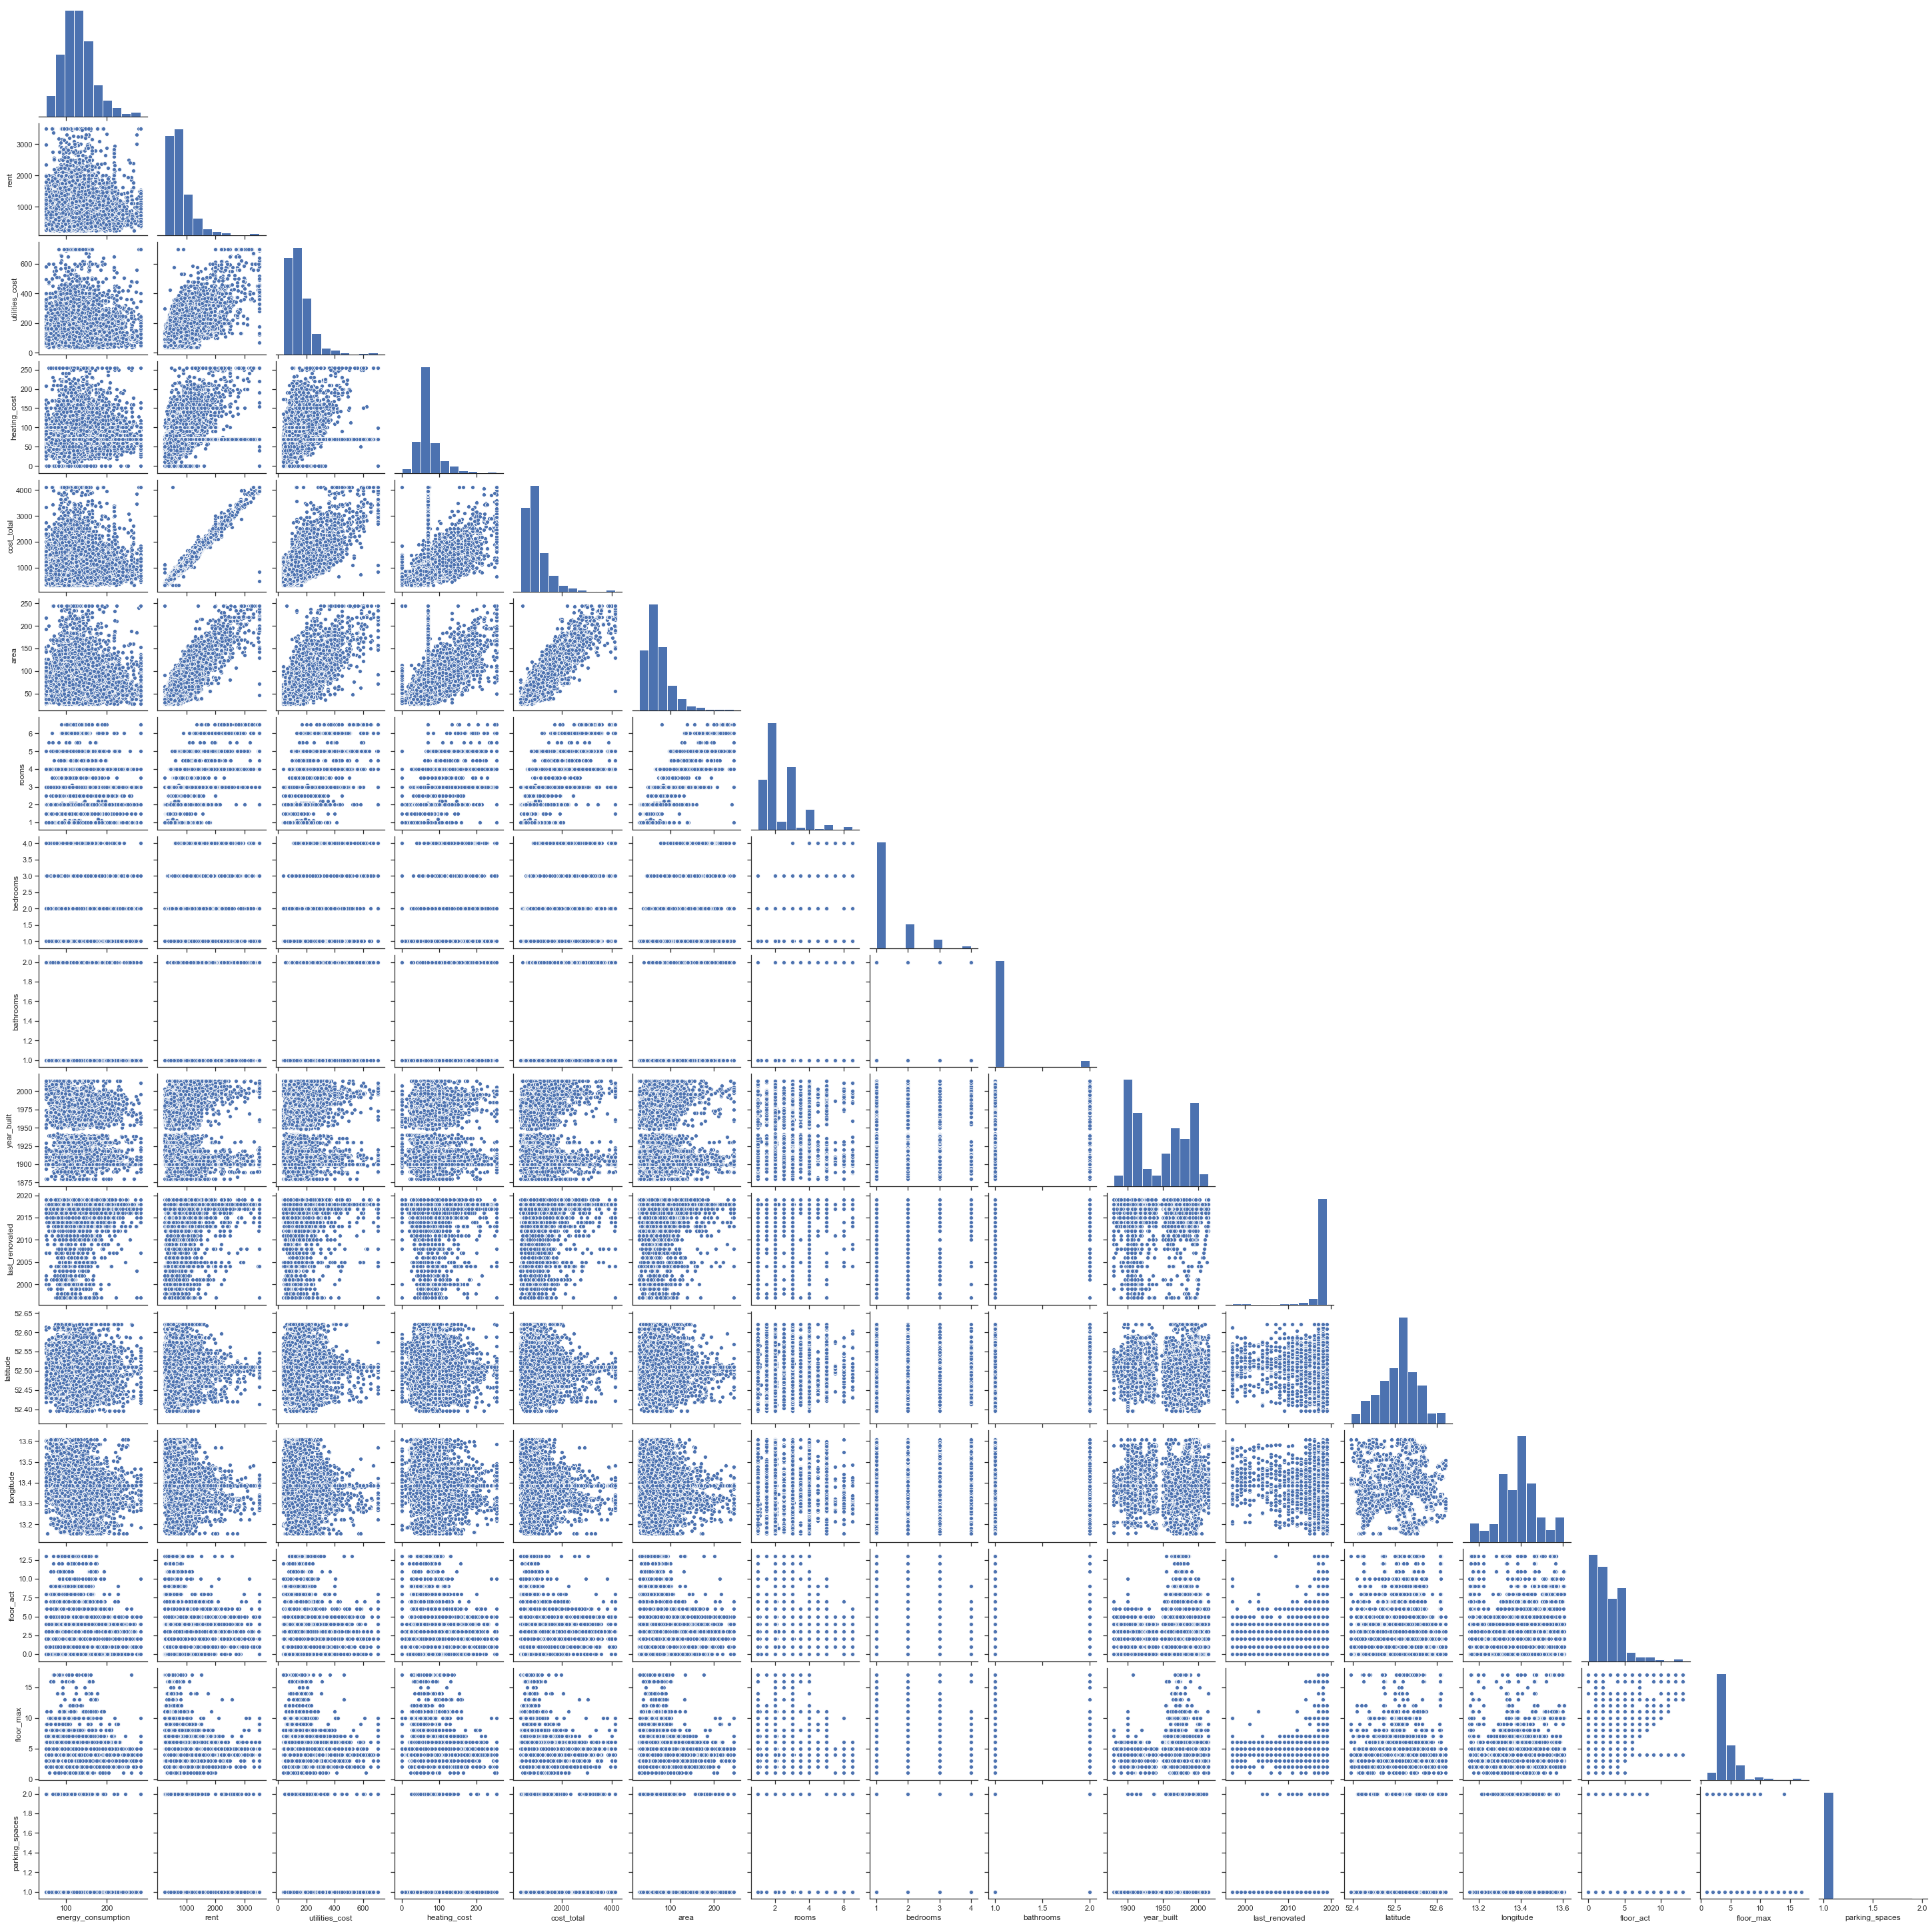

In [17]:
_ = sns.pairplot(df_num, corner=True)
plt.show()

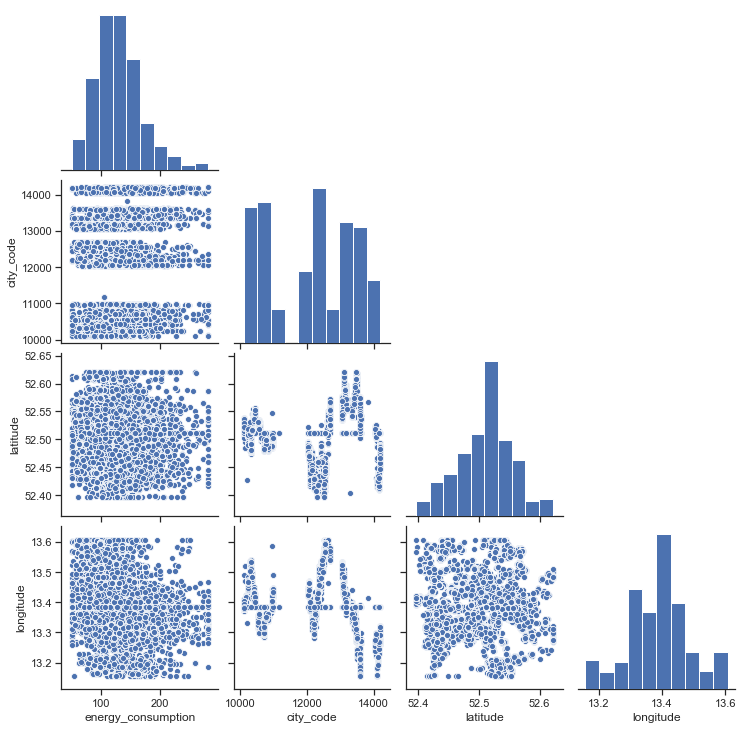

In [18]:
_ = sns.pairplot(df[['energy_consumption', 'city_code',
                     'latitude','longitude']], corner=True)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


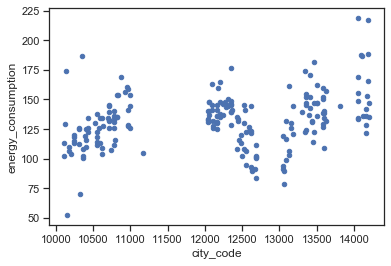

In [19]:
df_codes = df[['city_code','energy_consumption']].set_index('city_code')
df_codes_fin=df_codes.groupby(level='city_code').mean().reset_index()



df_codes_fin.plot(x= 'city_code', y='energy_consumption', kind='scatter')

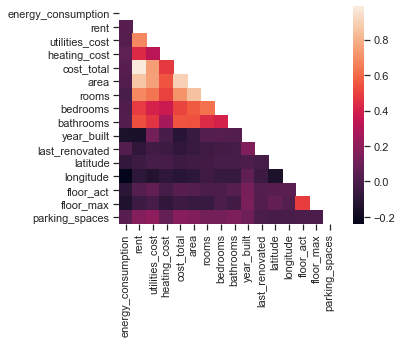

energy_consumption    1.000000
year_built            0.149581
longitude             0.240090
floor_act             0.104170
floor_max             0.135221
Name: energy_consumption, dtype: float64


In [29]:
corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_ = sns.heatmap(corr, mask = mask, square=True)
plt.show()

# Correlation with output variable
corr_target = abs(corr["energy_consumption"])

# Selecting highly correlated features
best_features = corr_target[corr_target > 0.1]
print(best_features)

In [30]:
def cat_heatmap_printer(df, cols):
    """
    erwartet df und Liste. Printet die dummies der categorials als heatmap. 
    """
    for col in cols:
        dummies = pd.get_dummies(df[col])
        df_dummies = pd.concat([df.energy_consumption, dummies], axis=1)
        corr = df_dummies.corr()
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        _ = sns.heatmap(corr,linewidths=.5, mask = mask, square=True)
        plt.title(col)
        plt.show()

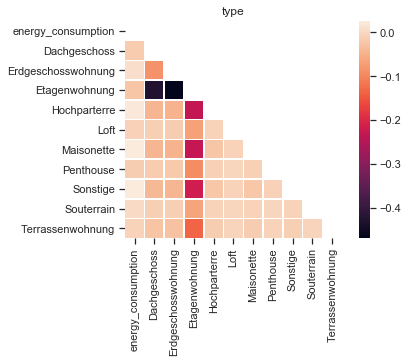

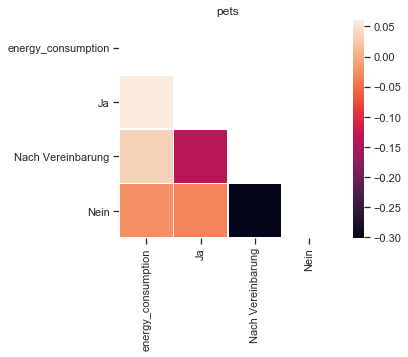

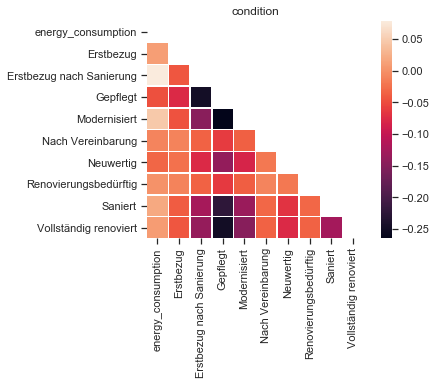

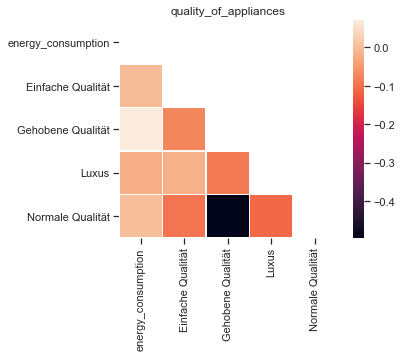

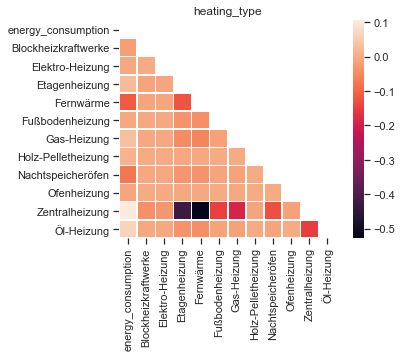

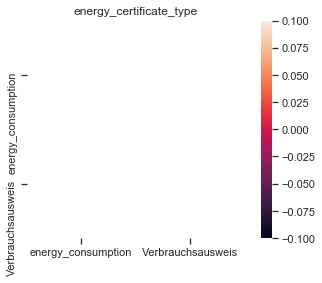

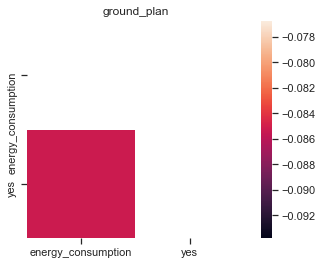

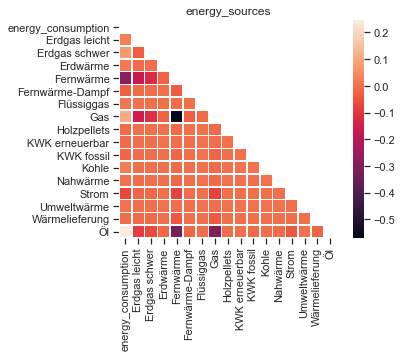

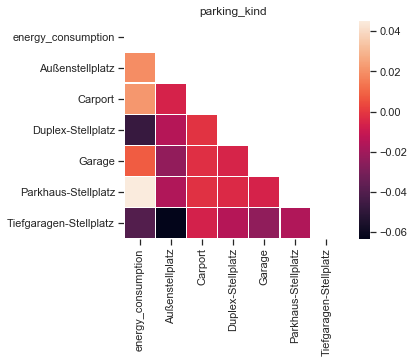

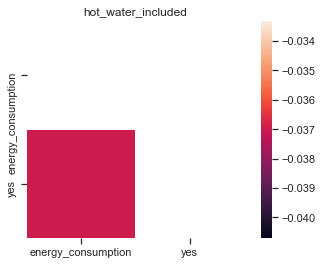

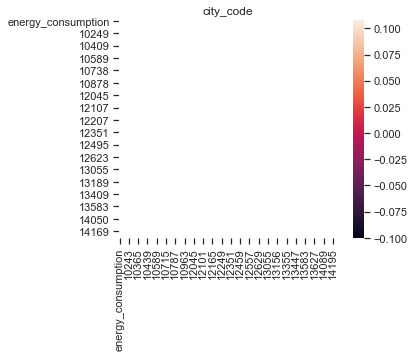

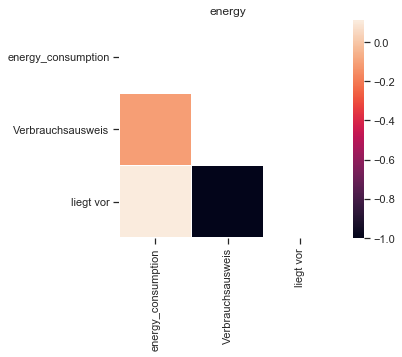

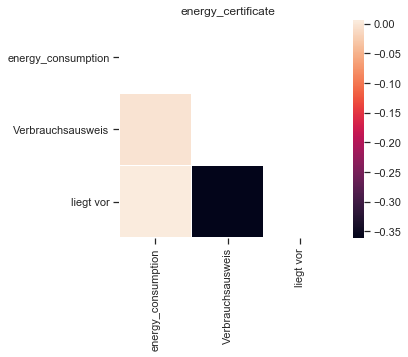

In [31]:
cat_heatmap_printer(df, categorials)

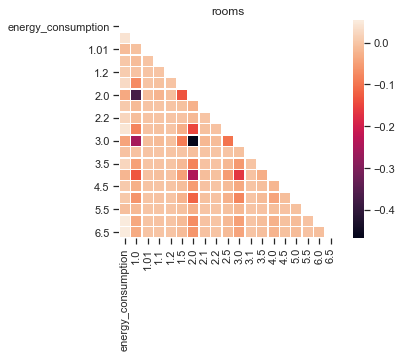

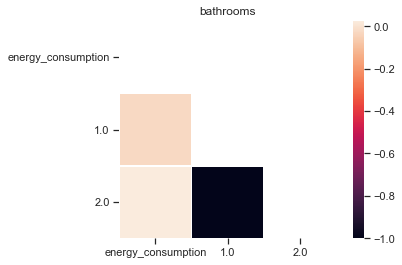

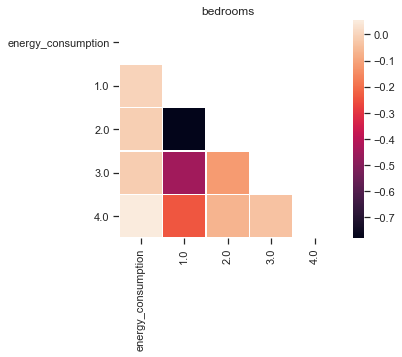

In [33]:
#cat_printer für nums mit kleiner Ausprägungszahl: 

cat_heatmap_printer(df, ['rooms','bathrooms','bedrooms'])

In [ ]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
# from sklearn.model_selection import train_test_split

#load data
df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_preprocessed.csv")

# split data
X = df.iloc[:,1:]
y = df.iloc[:,0]


# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)